<a href="https://colab.research.google.com/github/pgssanjana/micro_projects/blob/main/new_tbdataset_resnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            632  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-30 09:11:54          11444  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           1522  
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           1397  
iamsouravbanerjee/analytics-industry

In [2]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

 99% 1.73G/1.74G [00:42<00:00, 38.7MB/s]
100% 1.74G/1.74G [00:42<00:00, 43.7MB/s]


In [3]:
import zipfile
zf = "/content/chest-xray-pneumoniacovid19tuberculosis.zip"
target_dir = "/content/dataset/chest-xray"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [4]:
import os
import shutil
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.python.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.models import Model
# from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50 
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile

In [5]:
train_normal = os.listdir('/content/dataset/chest-xray/train/NORMAL')
train_Tb = os.listdir('/content/dataset/chest-xray/train/TURBERCULOSIS')
print(train_normal[1])
print(train_Tb[1])

NORMAL2-IM-1023-0001.jpeg
Tuberculosis-555.png


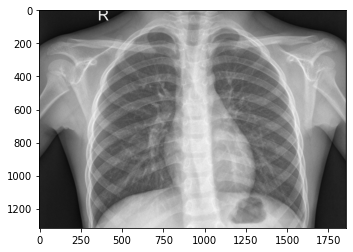

In [6]:
img = image.load_img('/content/dataset/chest-xray/test/NORMAL/IM-0001-0001.jpeg')

img = image.img_to_array(img)

img =img /255.0
plt.imshow(img)
plt.show()

In [7]:
def show_imgs(num_of_imgs):
  for i in range(num_of_imgs):
    tb_pic = '/content/dataset/chest-xray/train/TURBERCULOSIS/'+train_Tb[i]

    normal_pic = '/content/dataset/chest-xray/train/NORMAL/'+train_normal[i]

    tb_pic = image.load_img(tb_pic)

    normal_pic = image.load_img(normal_pic)

    tb_pic = image.img_to_array(tb_pic)

    tb_pic =tb_pic /255.0

    normal_pic = image.img_to_array(normal_pic)

    normal_pic =normal_pic /255.0

    fig=plt.figure(figsize=(7,7))

    normal_plot = fig.add_subplot(1,2,1)
    plt.imshow(normal_pic,cmap='gray')
    normal_plot.set_title('Normal')
    plt.axis('off')

    Tb_plot = fig.add_subplot(1,2,2)
    plt.imshow(tb_pic,cmap='gray')
    normal_plot.set_title('Tb')
    plt.axis('off')

    plt.show()

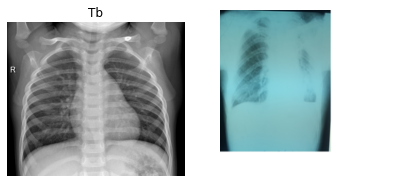

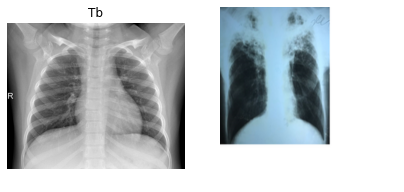

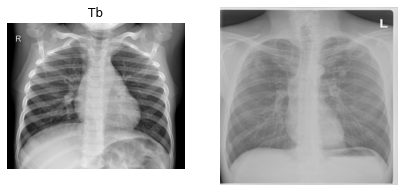

In [8]:
show_imgs(3)


In [9]:
s=32
IMAGE_SIZE = [224, 224]


In [10]:
train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )
val_gen = ImageDataGenerator(rescale=1.0/255)

In [11]:
os.mkdir('trash')


In [12]:
!ls


chest-xray-pneumoniacovid19tuberculosis.zip  kaggle.json  trash
dataset					     sample_data


In [13]:
os.listdir('/content/dataset/chest-xray/test')


['TURBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID19']

In [18]:
import os
import shutil
import numpy as np
def make_dirs_for_data():
  # path='/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Tuberculosis'
  # os.listdir(path)[1]

  # par_dir="/content/trash"
  # path = par_dir+'/test'
  # os.mkdir(path)

  # path=par_dir+'/validation'
  # os.mkdir(path)

  # path=par_dir+'/train'
  # os.mkdir(path)

  # path_of_train = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train" 
  # path_of_train_normal = path_of_train+'/Normal'
  # path_of_train_Tb = path_of_train+'/Tb'

  # os.mkdir(path_of_train_normal)
  # os.mkdir(path_of_train_Tb)

  # path_of_test = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test"
  # path_of_test_normal = path_of_test+'/Normal'
  # path_of_test_Tb = path_of_test+'/Tb'

  # os.mkdir(path_of_test_normal)
  # os.mkdir(path_of_test_Tb)

  # path_of_val = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation"
  # path_of_val_normal = path_of_val+'/Normal'
  # path_of_val_Tb = path_of_val+'/Tb'

  # os.mkdir(path_of_val_normal)
  # os.mkdir(path_of_val_Tb)

  source ='/content/dataset/chest-xray/test/'
  destination = '/content/trash/'
  allfiles = os.listdir(source)
  for f in allfiles:
    if(f=='COVID19' or f=='PNEUMONIA'):
      shutil.move(source + f, destination + f)

  source ='/content/dataset/chest-xray/train/'
  destination = '/content/trash/'
  allfiles = os.listdir(source)
  for f in allfiles:
    if(f=='COVID19' or f=='PNEUMONIA'):
      shutil.move(source + f, destination + f +'a')

  source ='/content/dataset/chest-xray/val/'
  destination = '/content/trash/'
  allfiles = os.listdir(source)
  for f in allfiles:
    if(f=='COVID19' or f=='PNEUMONIA'):
      shutil.move(source + f, destination + f + 'b')

  # source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Tuberculosis/'
  # destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
  # allfiles = os.listdir(source)
  # for f in allfiles:
  #   shutil.move(source + f, destination + f)

  # source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
  # destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Noraml/'
  # source ='/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
  # destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Normal/'
  # allfiles = os.listdir(source)
  # np.random.shuffle(allfiles)
  # allfiles = allfiles[:50]
  # for f in allfiles:
  #   shutil.move(source + f, destination + f)

  # source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
  # destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Normal/'
  # allfiles = os.listdir(source)
  # np.random.shuffle(allfiles)
  # allfiles = allfiles[:50]
  # for f in allfiles:
  #   shutil.move(source + f, destination + f)


  # source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
  # destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Tb/'
  # allfiles = os.listdir(source)
  # np.random.shuffle(allfiles)
  # allfiles = allfiles[:50]
  # for f in allfiles:
  #   shutil.move(source + f, destination + f)

  # source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
  # destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Tb/'
  # allfiles = os.listdir(source)
  # np.random.shuffle(allfiles)
  # allfiles = allfiles[:50]
  # for f in allfiles:
  #   shutil.move(source + f, destination + f)

  print("test-normal",len(os.listdir('/content/dataset/chest-xray/test/NORMAL')))
  print("val-normal",len(os.listdir('/content/dataset/chest-xray/val/NORMAL')))
  print("train-normal",len(os.listdir("/content/dataset/chest-xray/train/NORMAL")))

  print("test-Tb",len(os.listdir('/content/dataset/chest-xray/test/TURBERCULOSIS')))
  print("val-Tb",len(os.listdir('/content/dataset/chest-xray/val/TURBERCULOSIS')))
  print("train-Tb",len(os.listdir('/content/dataset/chest-xray/train/TURBERCULOSIS')))

In [19]:
make_dirs_for_data()


test-normal 234
val-normal 8
train-normal 1341
test-Tb 41
val-Tb 12
train-Tb 650


In [20]:
train_generator = train_gen.flow_from_directory(
    '/content/dataset/chest-xray/train/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)
val_generator = val_gen.flow_from_directory(
    "/content/dataset/chest-xray/val/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1991 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [21]:
train_generator.image_shape


(224, 224, 3)

In [22]:
train_generator.class_indices


{'NORMAL': 0, 'TURBERCULOSIS': 1}

In [23]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import regularizers

from tensorflow.keras.applications import ResNet50
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]


In [24]:
model = Sequential()

model.add(ResNet50(include_top=False,input_tensor=None,input_shape=(224,224,3),pooling='avg',classes=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               52

In [25]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [27]:
batch_size=64
epochs=15
# History = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),validation_data=(x_val,y_val),
#                               epochs= epochs, steps_per_epoch=x_train.shape[0]//batch_size,verbose=1,callbacks=[red_lr]
#                              )
#1991/15
History = model.fit_generator(train_generator  ,
                              validation_data=val_generator,
                              epochs= epochs, 
                              steps_per_epoch=30,
                              verbose=1,
                              callbacks=my_callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 0.8290 - accuracy: 0.5385
Epoch 00001: val_loss improved from inf to 1.77283, saving model to model.01-1.77.h5
30/30 [==============================] - 45s 1s/step - loss: 0.8290 - accuracy: 0.5385 - val_loss: 1.7728 - val_accuracy: 0.4000
Epoch 2/15
30/30 [==============================] - ETA: 0s - loss: 0.7441 - accuracy: 0.6150
Epoch 00002: val_loss improved from 1.77283 to 1.13609, saving model to model.02-1.14.h5
30/30 [==============================] - 31s 1s/step - loss: 0.7441 - accuracy: 0.6150 - val_loss: 1.1361 - val_accuracy: 0.4000
Epoch 3/15
30/30 [==============================] - ETA: 0s - loss: 0.7296 - accuracy: 0.6375
Epoch 00003: val_loss improved from 1.13609 to 0.97324, saving model to model.03-0.97.h5
30/30 [==============================] - 30s 1s/step - loss: 0.7296 - accuracy: 0.6375 - val_loss: 0.9732 - val_accuracy: 0.4000
Epoch 4/15
30/30 [==============================] - ETA: 0s - loss: 

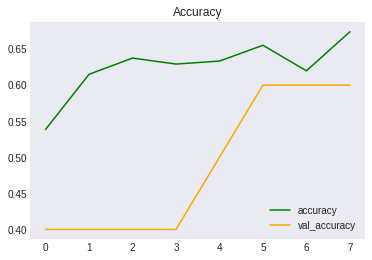

In [28]:
plt.style.use("seaborn-dark")
plt.title("Accuracy")
plt.plot(History.history['accuracy'],label="accuracy",c='green')
plt.plot(History.history['val_accuracy'],label="val_accuracy",c='orange')
plt.legend()
plt.show()

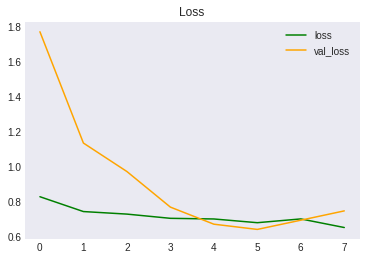

In [29]:
plt.style.use("seaborn-dark")
plt.title("Loss")
plt.plot(History.history['loss'],label="loss",c='green')
plt.plot(History.history['val_loss'],label="val_loss",c='orange')
plt.legend()
plt.show()

In [ ]:
LOG_DIR = '/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)